# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [53]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Lendo e limpando a base de dados
credit = pd.read_csv('/content/credit.csv')
credit = credit.drop('Unnamed: 0', axis=1)

# Criando variáveis resposta e explicativas
y = credit['mau']
X = credit.drop('mau', axis=1)

# Separando a base em base de testes e base de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [60]:
# Criando a arvore de decisão
tree = DecisionTreeClassifier(random_state=100).fit(X_train, y_train)

[Text(0.6171911554665629, 0.9807692307692307, 'tempo_emprego <= 2.5\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = aprovados'),
 Text(0.3347436061896449, 0.9423076923076923, 'educacao_Incomplete higher <= 0.5\ngini = 0.058\nsamples = 4374\nvalue = [4243, 131]\nclass = aprovados'),
 Text(0.2336720445644994, 0.9038461538461539, 'estado_civil_Married <= 0.5\ngini = 0.055\nsamples = 4232\nvalue = [4113, 119]\nclass = aprovados'),
 Text(0.13100872691956844, 0.8653846153846154, 'tipo_residencia_Co-op apartment <= 0.5\ngini = 0.074\nsamples = 1396\nvalue = [1342, 54]\nclass = aprovados'),
 Text(0.10552662310087761, 0.8269230769230769, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.073\nsamples = 1393\nvalue = [1340, 53]\nclass = aprovados'),
 Text(0.06060186058947501, 0.7884615384615384, 'idade <= 28.5\ngini = 0.069\nsamples = 1348\nvalue = [1300, 48]\nclass = aprovados'),
 Text(0.019124909565600326, 0.75, 'idade <= 27.5\ngini = 0.133\nsamples = 112\nvalue = [104, 8]\ncl

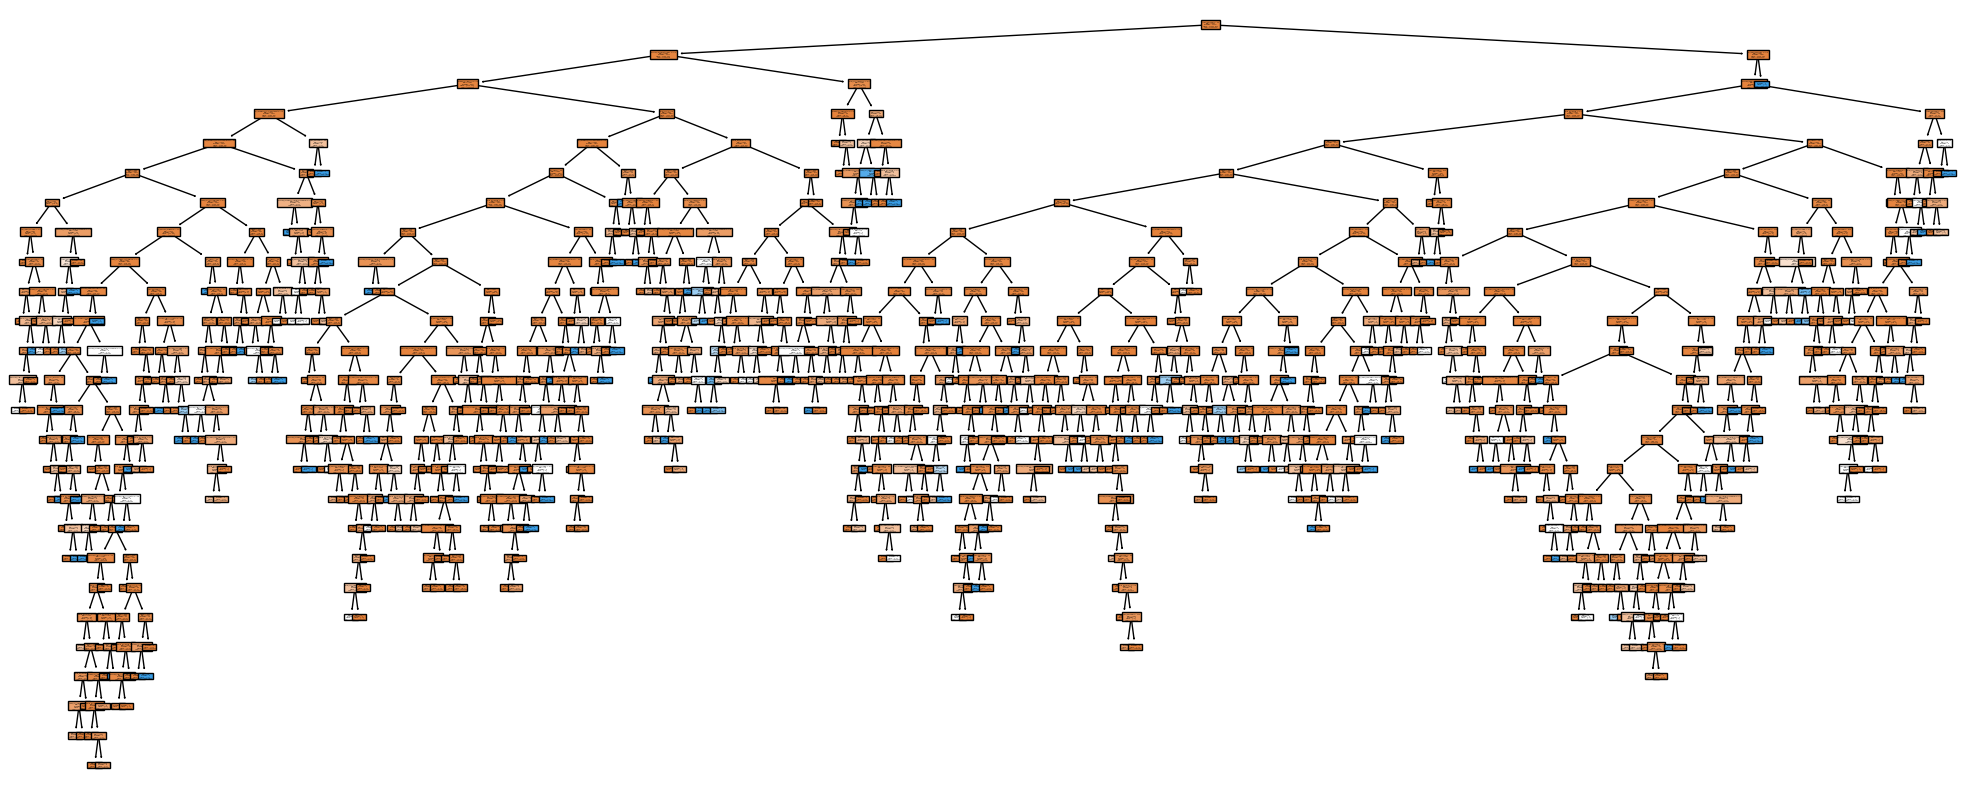

In [21]:
# Plotando o modelo
plt.figure(figsize=(25, 10))
plot_tree(tree, filled=True, class_names=['aprovados', 'reprovados'], feature_names=X_train.columns)

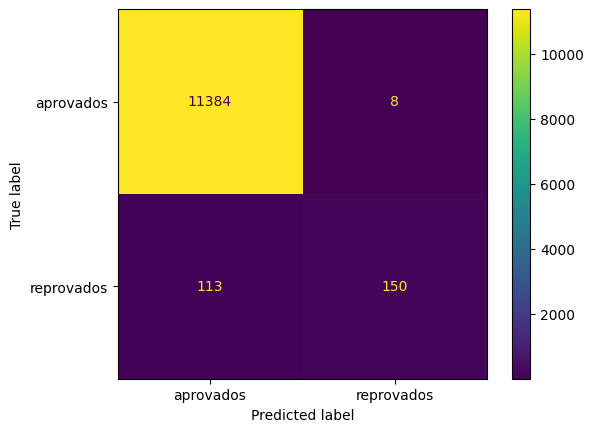

In [22]:
# Criando e plotando a nossa matriz de confusão
predict = tree.predict(X_train)
cm = confusion_matrix(y_train, predict, labels=tree.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [23]:
# Calculando a acurácia do modelo
accuracy_score(y_train, predict)

0.9896181896181896

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [59]:
# Criando uma árvore com a base de teste
tree_v2 = DecisionTreeClassifier(random_state=100).fit(X_test, y_test)

[Text(0.600828565140845, 0.9772727272727273, 'tempo_emprego <= 2.5\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]\nclass = aprovados'),
 Text(0.28468970070422533, 0.9318181818181818, 'idade <= 30.5\ngini = 0.074\nsamples = 1816\nvalue = [1746, 70]\nclass = aprovados'),
 Text(0.09464788732394366, 0.8863636363636364, 'sexo <= 0.5\ngini = 0.157\nsamples = 256\nvalue = [234, 22]\nclass = aprovados'),
 Text(0.0676056338028169, 0.8409090909090909, 'qt_pessoas_residencia <= 2.5\ngini = 0.234\nsamples = 133\nvalue = [115, 18]\nclass = aprovados'),
 Text(0.04056338028169014, 0.7954545454545454, 'estado_civil_Single / not married <= 0.5\ngini = 0.162\nsamples = 90\nvalue = [82, 8]\nclass = aprovados'),
 Text(0.027042253521126762, 0.75, 'tipo_renda_State servant <= 0.5\ngini = 0.074\nsamples = 52\nvalue = [50, 2]\nclass = aprovados'),
 Text(0.018028169014084508, 0.7045454545454546, 'idade <= 24.5\ngini = 0.041\nsamples = 48\nvalue = [47, 1]\nclass = aprovados'),
 Text(0.013521126760563381, 0.6

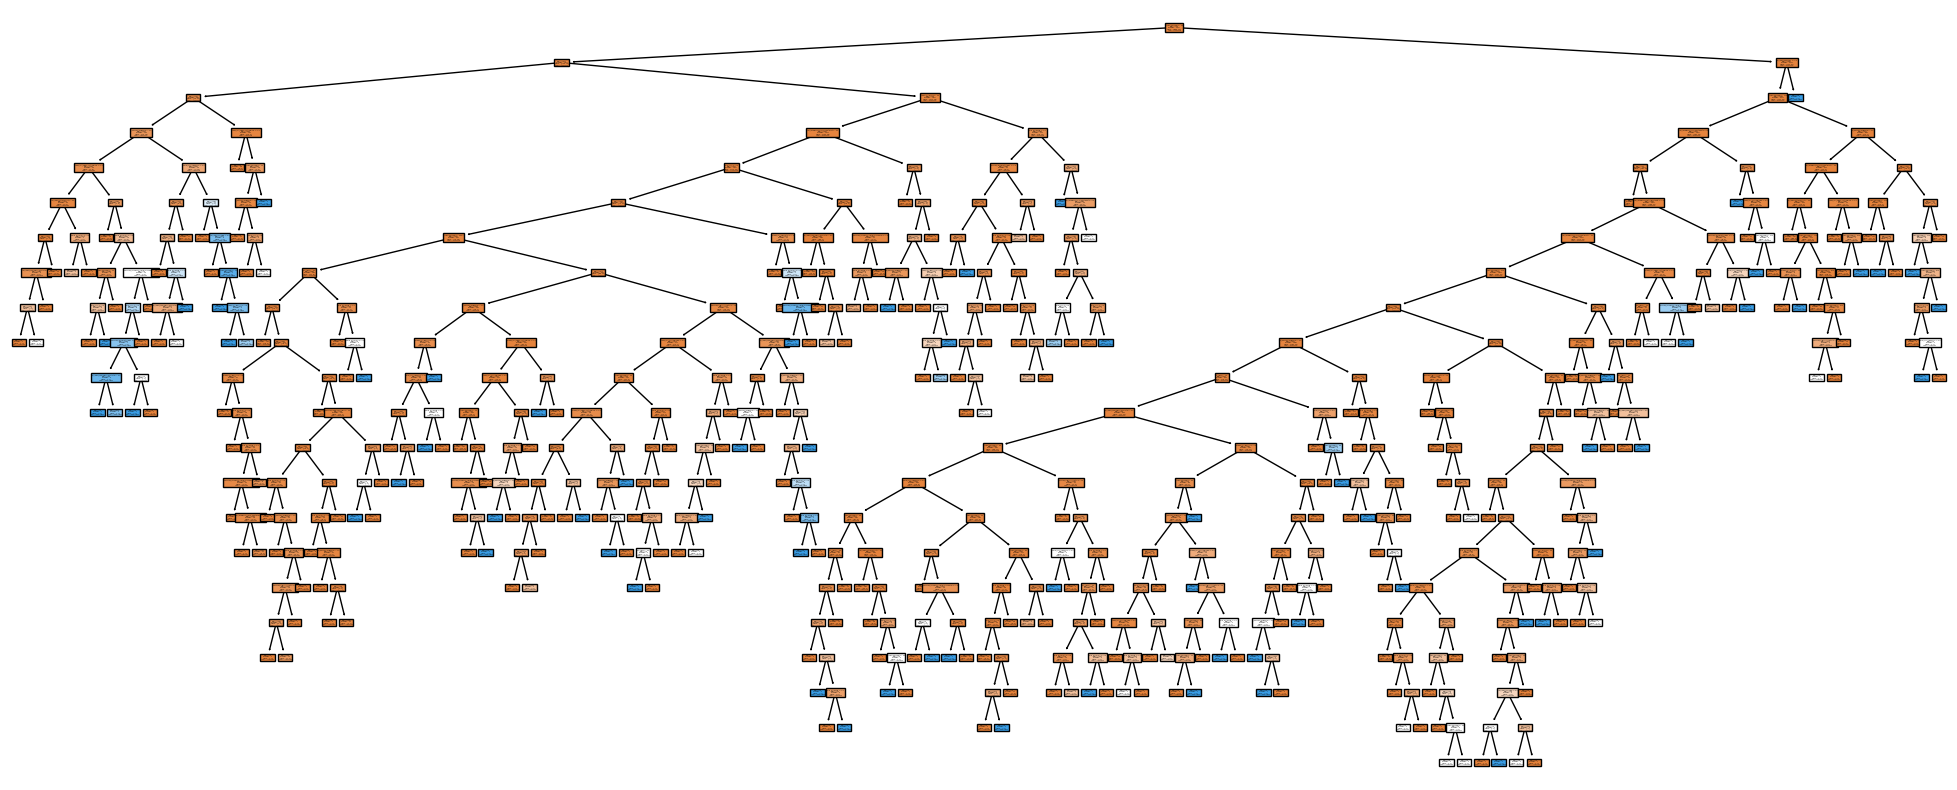

In [32]:
# Plotando o modelo
plt.figure(figsize=(25, 10))
plot_tree(tree_v2, filled=True, class_names=['aprovados', 'reprovados'], feature_names=X_test.columns)

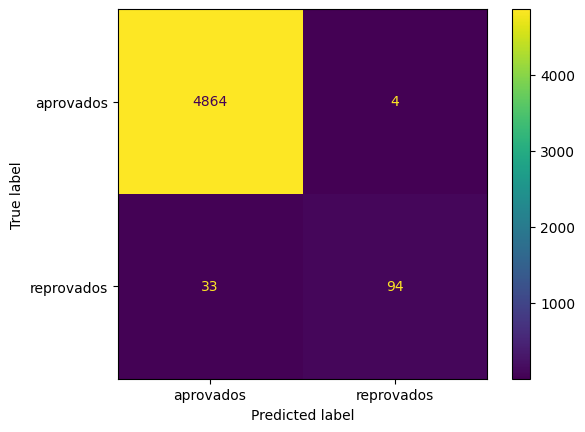

In [40]:
# Calculando e plotando novamente a matriz de confusão
predict = tree_v2.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=tree_v2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [41]:
# Calculando a acurácia do modelo de testes
accuracy_score(y_test, predict)

0.9925925925925926

In [61]:
# Criando uma árvore com uma profundidade maior (árvore podada)
tree_v3 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123).fit(X_test, y_test)

[Text(0.5664465206185567, 0.9545454545454546, 'tempo_emprego <= 2.5\ngini = 0.05\nsamples = 4995\nvalue = [4868, 127]\nclass = aprovados'),
 Text(0.30009664948453607, 0.8636363636363636, 'idade <= 30.5\ngini = 0.074\nsamples = 1816\nvalue = [1746, 70]\nclass = aprovados'),
 Text(0.14690721649484537, 0.7727272727272727, 'sexo <= 0.5\ngini = 0.157\nsamples = 256\nvalue = [234, 22]\nclass = aprovados'),
 Text(0.10824742268041238, 0.6818181818181818, 'qt_pessoas_residencia <= 2.5\ngini = 0.234\nsamples = 133\nvalue = [115, 18]\nclass = aprovados'),
 Text(0.061855670103092786, 0.5909090909090909, 'estado_civil_Single / not married <= 0.5\ngini = 0.162\nsamples = 90\nvalue = [82, 8]\nclass = aprovados'),
 Text(0.041237113402061855, 0.5, 'educacao_Incomplete higher <= 0.5\ngini = 0.074\nsamples = 52\nvalue = [50, 2]\nclass = aprovados'),
 Text(0.030927835051546393, 0.4090909090909091, 'tipo_renda_Working <= 0.5\ngini = 0.045\nsamples = 43\nvalue = [42, 1]\nclass = aprovados'),
 Text(0.0206185

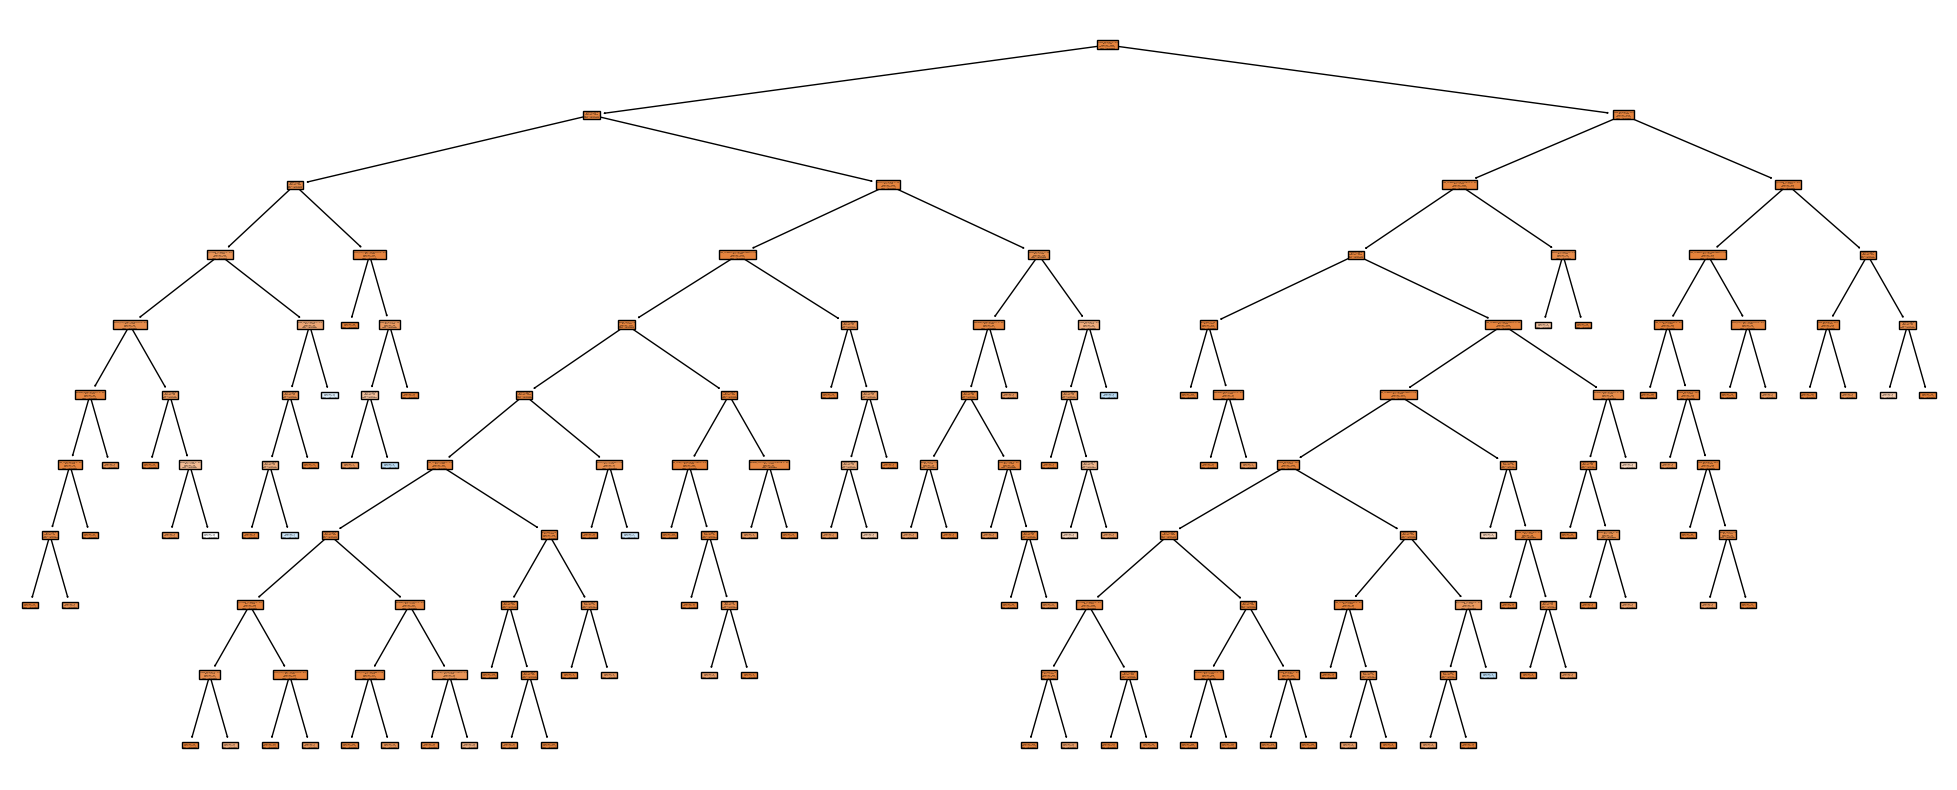

In [30]:
# Plotando o modelo
plt.figure(figsize=(25, 10))
plot_tree(tree_v3, filled=True, class_names=['aprovados', 'reprovados'], feature_names=X_test.columns)

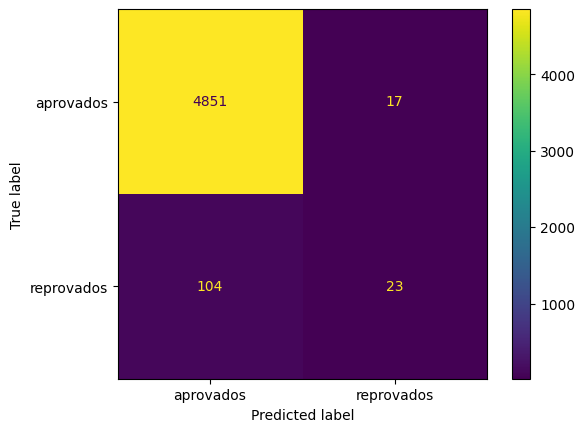

In [39]:
# Criando e plotando a matriz de confusão
predict = tree_v3.predict(X_test)
cm = confusion_matrix(y_test, predict, labels=tree_v3.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [69]:
# Classificando todos os proponentes como bons
y_test_bons = pd.Series(index=y_test.index, data=[True for n in range(0, len(y_test))])
y_test_bons

2875     True
2551     True
935      True
140      True
3048     True
         ... 
7624     True
11130    True
7160     True
8231     True
15323    True
Length: 4995, dtype: bool

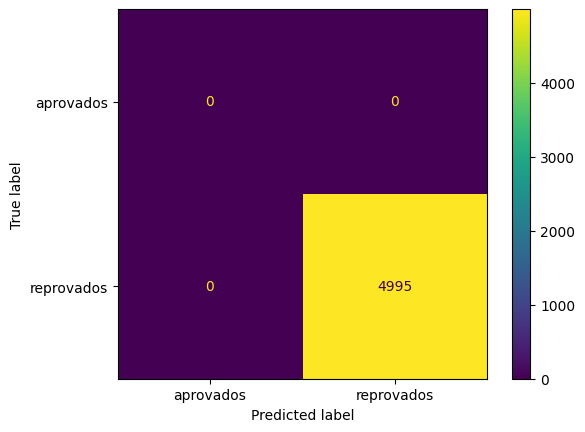

In [70]:
# Criando uma nova árvore de decisão e plotando a matriz de confusão
tree_v4 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123).fit(X_test, y_test_bons)

predict = tree_v4.predict(X_test)
cm = confusion_matrix(y_test_bons, predict, labels=tree_v3.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])
disp.plot()
plt.show()

In [71]:
# Calculando a acurácia do modelo caso todas as propostas fossem boas
accuracy_score(y_test_bons, predict)

1.0